# Regressão 01 - tarefa 03 - transformações em X e Y

Carregue os pacotes necessários e a base de gorjetas.

### I. Modelo no valor da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo em ```tip```, explicada por ```sex, smoker, diner e net_bill```. ✓
2. Remova as variáveis não significantes. ✓
3. observe o gráfico de resíduos em função de ```net_bill``` ✓
4. teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo. ✓

In [1]:
# Atualmente, este é meu bloco fixo de importações
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import requests as rq

%matplotlib inline

# Bloco utilizado para modelagem
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Construcao das variaveis gorjeta percentual e conta liquida
tips = sns.load_dataset("tips")
tips["tip_pct"] = tips["tip"] / (tips["total_bill"] - tips["tip"])
tips["net_bill"] = tips["total_bill"] - tips["tip"]

print(tips.columns) # Para mostrar que não há uma variável "diner", mas sim "time"

# Exibindo a matriz design pelo Patsy com as variaveis exigidas
y, X = patsy.dmatrices("tip ~ sex + smoker + time + net_bill", tips)
X

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'tip_pct',
       'net_bill'],
      dtype='object')


DesignMatrix with shape (244, 5)
  Intercept  sex[T.Female]  smoker[T.No]  time[T.Dinner]  net_bill
          1              1             1               1     15.98
          1              0             1               1      8.68
          1              0             1               1     17.51
          1              0             1               1     20.37
          1              1             1               1     20.98
          1              0             1               1     20.58
          1              0             1               1      6.77
          1              0             1               1     23.76
          1              0             1               1     13.08
          1              0             1               1     11.55
          1              0             1               1      8.56
          1              1             1               1     30.26
          1              0             1               1     13.85
          1              0   

In [2]:
# Avaliando quais variáveis são significantes
modelo = smf.ols("tip ~ sex + smoker + time + net_bill", tips).fit()
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    tip   R-squared:                       0.335
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     30.13
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           2.64e-20
Time:                        17:43:00   Log-Likelihood:                -375.13
No. Observations:                 244   AIC:                             760.3
Df Residuals:                     239   BIC:                             777.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          1.1999      0.242      4.952      0.000       0.723       1.677
sex[T.Female]     -0.0034      0.156     -0.022      0.982      -0.311       0.305
smoker[T.No]       0.1405      0.151      0.932      0.352      -0.156       0.437
time[T.Dinner]     0.0584      0.168      0.347      0.729      -0.273       0.390
net_bill           0.0995      0.009     10.662      0.000       0.081       0.118
==============================================================================
Omnibus:                       36.537   Durbin-Watson:                   2.121
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.875
Skew:                           0.800   Prob(JB):                     4.96e-15
Kurtosis:                       4.980   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

No caso, "significantes" deve se referir ao valor alpha de significância. Escolhendo o valor de maior popularidade como α = 5%, teríamos que apenas net_bill seja significante dentre as variáveis exigidas. Logo, devemos retirar o sexo, fumante e horário do modelo.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        17:43:00   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

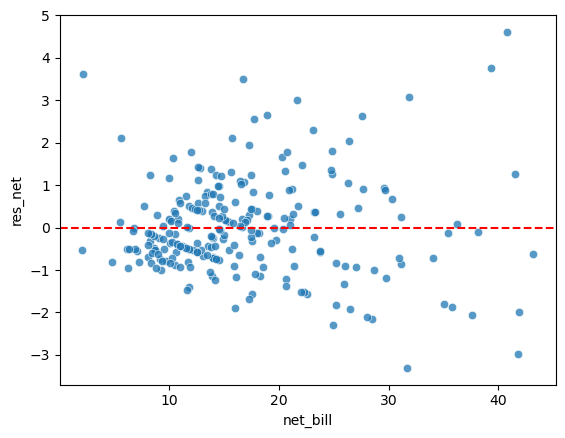

In [3]:
# Gerando um novo modelo, apenas com a variável significante
modelo_limpo = smf.ols("tip ~ net_bill", tips).fit()
print(modelo_limpo.summary())
tips["res_net"] = modelo_limpo.resid

sns.scatterplot(x = "net_bill", y = "res_net", data = tips, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contém resíduos

É notável o padrão cônico de crescimento dos resíduos, com maior incidência residual entre 10 e 20 dolares de gorjeta liquida.  Estatísticamente, devemos notar a presença de alguns resíduo outliers, fato que pode influênciar no ajuste.

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.294
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     101.0
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           4.40e-20
Time:                        17:43:01   Log-Likelihood:                -382.40
No. Observations:                 244   AIC:                             768.8
Df Residuals:                     242   BIC:                             775.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.2575      0.430  

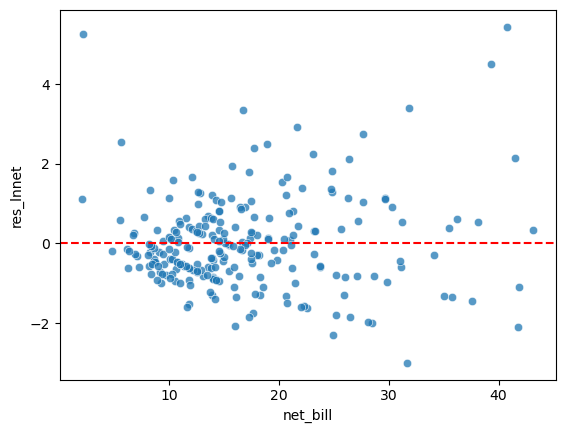

In [4]:
# Aplicando transformação logarítmica na variável conta líquida
modelo_lnnet = smf.ols("tip ~ np.log(net_bill)", tips).fit()
print(modelo_lnnet.summary())
tips["res_lnnet"] = modelo_lnnet.resid

sns.scatterplot(x = "net_bill", y = "res_lnnet", data = tips, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contém resíduos

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.334
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     60.55
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           4.96e-22
Time:                        17:43:01   Log-Likelihood:                -375.28
No. Observations:                 244   AIC:                             756.6
Df Residuals:                     241   BIC:                             767.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.0743      0.353  

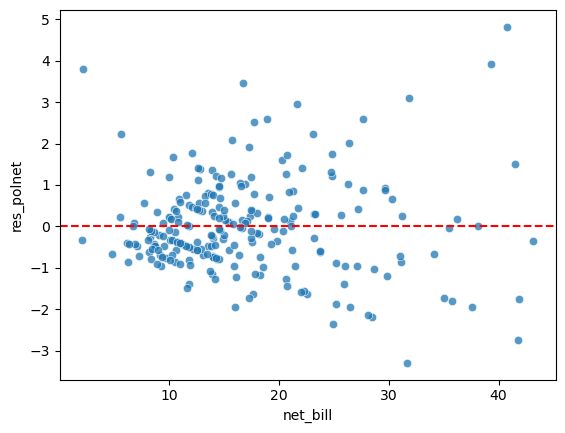

In [5]:
# Aplicando transformação polinomial na variável conta líquida
modelo_polnet = smf.ols("tip ~ 1 + net_bill + I(net_bill ** 2)", tips).fit()
print(modelo_polnet.summary())
tips["res_polnet"] = modelo_polnet.resid

sns.scatterplot(x = "net_bill", y = "res_polnet", data = tips, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contém resíduos

O melhor modelo em relação ao comportamento residual geral, é o logaritmico.

Apesar de possuir um R² levemente menor que os outros dois modelos, a visualização da distribuição dos pontos residuais demonstra um melhor ajuste. Além da significância apresentada pelo p-value da regressão, frente ao polinômio, onde o fator quadrático não apresentuo significância ao nível de 5% (o que gera custo computacional desnecessário para previsão das gorjetas, uma vez que a regressão linear foi mais expressiva).

Estatísticamente, devemos notar a presença de alguns resíduo outliers, fato que pode influênciar no ajuste.

### II. Modelo no valor do percentual da gorjeta

1. Crie a matriz de design (e a matriz y) utilizando o Patsy, para um modelo no log de ```tip```, explicado por ```sex, smoker, diner e net_bill```. ✓
2. Remova as variáveis não significantes. ✓
3. Observe o gráfico de resíduos em função de ```net_bill```. ✓
4. Teste transformar ```net_bill``` no log e um polinômio. Escolha o melhor modelo. ✓
5. Do modelo final deste item, calcule o $R^2$ na escala de ```tip``` (sem o log). Compare com o modelo do item 1 (R² = 0,333). Qual tem melhor coeficiente de determinação? ✓

In [6]:
# Repetindo todo o processo com a transformação da variavel de interesse com ln da gorjeta percentual
y_ln_pct, X = patsy.dmatrices("np.log(tip_pct) ~ sex + smoker + time + net_bill", tips)

# Avaliando quais variáveis são significantes
modelo_lntip = smf.ols("np.log(tip_pct) ~ sex + smoker + time + net_bill", tips).fit()
modelo_lntip.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.45
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           3.16e-13
Time:                        17:43:02   Log-Likelihood:                -105.91
No. Observations:                 244   AIC:                             221.8
Df Residuals:                     239   BIC:                             239.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -1.2888      0.080    -16.032      0.000      -1.447      -1.130
sex[T.Female]      0.0168      0.052      0.323      0.747      -0.085       0.119
smoker[T.No]      -0.0055      0.050     -0.110      0.912      -0.104       0.093
time[T.Dinner]     0.0171      0.056      0.307      0.759      -0.093       0.127
net_bill          -0.0259      0.003     -8.371      0.000      -0.032      -0.020
==============================================================================
Omnibus:                       49.301   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              256.688
Skew:                           0.650   Prob(JB):                     1.82e-56
Kurtosis:                       7.854   Cond. No.                         71.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     74.48
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           8.27e-16
Time:                        17:43:02   Log-Likelihood:                -106.00
No. Observations:                 244   AIC:                             216.0
Df Residuals:                     242   BIC:                             223.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2749      0.056    -22.872      0.0

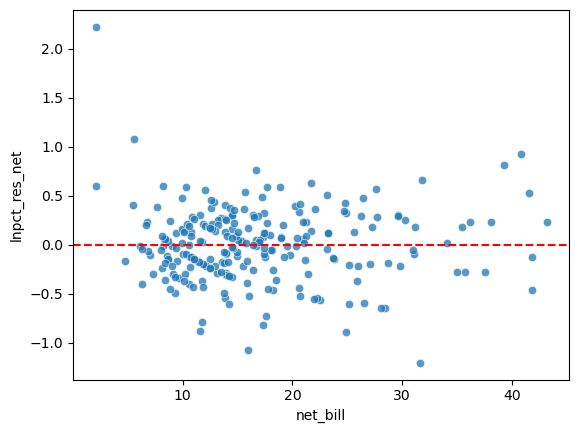

In [7]:
# Gerando um novo modelo, apenas com a variável significante
modelo_lnpct_limpo = smf.ols("np.log(tip_pct) ~ net_bill", tips).fit()
print(modelo_lnpct_limpo.summary())
tips["lnpct_res_net"] = modelo_lnpct_limpo.resid

sns.scatterplot(x = "net_bill", y = "lnpct_res_net", data = tips, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contém resíduos

De fato, os resíduos começaram a apresentar comportamento disperso, deixando de ser cônico. Estatísticamente, devemos notar a presença de 01 resíduo outlier, fato que pode influênciar no ajuste.

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.293
Model:                            OLS   Adj. R-squared:                  0.291
Method:                 Least Squares   F-statistic:                     100.5
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           5.20e-20
Time:                        17:43:02   Log-Likelihood:                -96.357
No. Observations:                 244   AIC:                             196.7
Df Residuals:                     242   BIC:                             203.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3942      0.133  

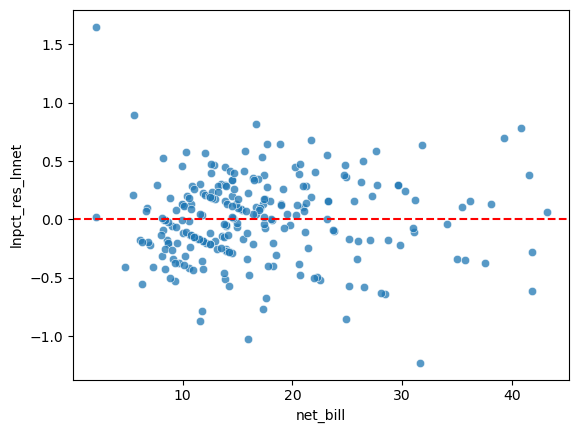

In [8]:
# Aplicando transformação logarítmica nas variaveis gorjeta percentual e conta líquida
modelo_lnpct_lnnet = smf.ols("np.log(tip_pct) ~ np.log(net_bill)", tips).fit()
print(modelo_lnpct_lnnet.summary())
tips["lnpct_res_lnnet"] = modelo_lnpct_lnnet.resid

sns.scatterplot(x = "net_bill", y = "lnpct_res_lnnet", data = tips, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contém resíduos

                            OLS Regression Results                            
Dep. Variable:        np.log(tip_pct)   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     42.39
Date:                Sat, 15 Jul 2023   Prob (F-statistic):           1.68e-16
Time:                        17:43:02   Log-Likelihood:                -101.97
No. Observations:                 244   AIC:                             209.9
Df Residuals:                     241   BIC:                             220.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.9862      0.115  

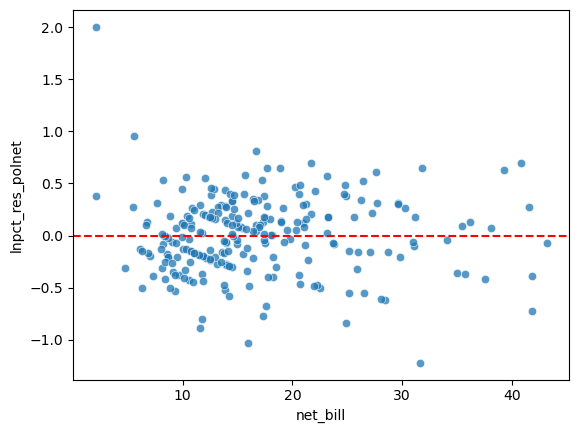

In [9]:
# Agora, aplicando transformação polinomial na variável conta líquida
modelo_lnpct_polnet = smf.ols("np.log(tip_pct) ~ 1 + net_bill + I(net_bill ** 2)", tips).fit()
print(modelo_lnpct_polnet.summary())
tips["lnpct_res_polnet"] = modelo_lnpct_polnet.resid

sns.scatterplot(x = "net_bill", y = "lnpct_res_polnet", data = tips, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contém resíduos

Desta vez o melhor modelo é o polinomial. Tal apresentou melhor comportamento nos quesitos do resíduo, apesar de ter R² um pouco menor novamente, a dispersão dos resíduos e a significância das variáveis descritivas polinomiais melhoraram bastante.

Matemáticamente isso significa que a linearização das gorjetas pode ser melhor descrita por um comportamento não linear da conta liquida. A principio pode parecer paradoxal, mas esta característica demonstra uma maior profundidade na relação entre a gorjeta e conta liquida. Estatísticamente, devemos notar a presença de 01 resíduo outlier, fato que pode influênciar no ajuste.

Este insight surge naturalmente após anos e anos de experiência com análises matemáticas. Um relatório mais didático é requerido para demonstração/explicação deste fato para quem não tem tanta familiaridade com a complexidade da bela matemática aplicada em dados.

In [10]:
# Utilizando o modelo final deste topico
tips["pred_y"] = np.exp(modelo_lnpct_polnet.fittedvalues)

# Calculando o R² em relação ao tip_pct sem o log
round(tips[["pred_y", "tip"]].corr().iloc[0,1]**2, 3)

0.292

No caso o modelo do item 1 apresenta melhor coeficiente de determinação.

Mas infelizmente acho que fiz este trecho errado. O tutor que estiver lendo isso, poderia me guiar melhor caso tenha errado?

### III. Previsão de renda

Vamos trabalhar a base que você vai usar no projeto do final deste ciclo.

Carregue a base ```previsao_de_renda.csv```. ✓

|variavel|descrição|
|-|-|
|data_ref                | Data de referência de coleta das variáveis |
|index                   | Código de identificação do cliente|
|sexo                    | Sexo do cliente|
|posse_de_veiculo        | Indica se o cliente possui veículo|
|posse_de_imovel         | Indica se o cliente possui imóvel|
|qtd_filhos              | Quantidade de filhos do cliente|
|tipo_renda              | Tipo de renda do cliente|
|educacao                | Grau de instrução do cliente|
|estado_civil            | Estado civil do cliente|
|tipo_residencia         | Tipo de residência do cliente (própria, alugada etc)|
|idade                   | Idade do cliente|
|tempo_emprego           | Tempo no emprego atual|
|qt_pessoas_residencia   | Quantidade de pessoas que moram na residência|
|renda                   | Renda em reais|

1. Ajuste um modelo de regressão linear simples para explicar ```renda``` como variável resposta, por ```tempo_emprego``` como variável explicativa. Observe que há muitas observações nessa tabela. Utilize os recursos que achar necessário. ✓
2. Faça uma análise de resíduos. Com os recursos vistos neste módulo, como você melhoraria esta regressão? ✓
3. Ajuste um modelo de regressão linear múltipla para explicar ```renda``` (ou uma transformação de ```renda```) de acordo com as demais variáveis. ✓
4. Remova as variáveis não significantes e ajuste novamente o modelo. Interprete os parâmetros. ✓
5. Faça uma análise de resíduos. Avalie a qualidade do ajuste. ✓

In [11]:
# Carregando os dados sem a coluna indice
df_renda = pd.read_csv("Base_m10.csv").iloc[:, 1:]
print(df_renda.shape)
df_renda.head()

(15000, 15)


,data_ref,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
0,2015-01-01,8682,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
1,2015-01-01,12830,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2,2015-01-01,2885,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
3,2015-01-01,16168,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
4,2015-01-01,12438,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37


In [12]:
# Ajustando o modelo simples para a relação exigida
modelo_t_emprego = smf.ols('''
                    renda ~ tempo_emprego
                  ''', df_renda).fit()

print(modelo_t_emprego.summary()) # Exibindo apenas o resumo devido as muitas observações

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.155
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     2294.
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:43:03   Log-Likelihood:            -1.2249e+05
No. Observations:               12466   AIC:                         2.450e+05
Df Residuals:                   12464   BIC:                         2.450e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2653.9453     60.924     43.561

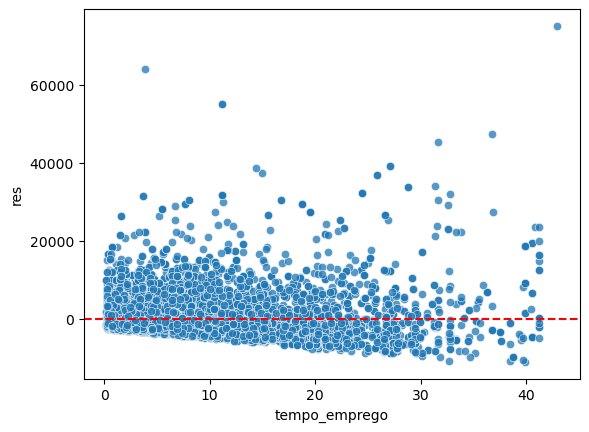

In [13]:
# Realizando a análise gráfica dos resíduos
df_renda["res"] = modelo_t_emprego.resid

sns.scatterplot(x = "tempo_emprego", y = "res", data = df_renda, alpha = .75)
plt.axhline(y=0, color="r", linestyle="--")

Creio que melhoraria usando uma transformação logaritmica na variável resposta, pois seus valores residuais variam grandiosamente entre 0~20000, mas também contém certos pontos espalhados entre 40k ~ 60k

In [14]:
# Como o exercício não cita quais demais variáveis, primeiramente vou analisar a significancia de todas
df_renda.columns

Index(['data_ref', 'index', 'sexo', 'posse_de_veiculo', 'posse_de_imovel',
       'qtd_filhos', 'tipo_renda', 'educacao', 'estado_civil',
       'tipo_residencia', 'idade', 'tempo_emprego', 'qt_pessoas_residencia',
       'mau', 'renda', 'res'],
      dtype='object')

In [15]:
# Avaliando quais variaveis sao significativas, o resíduo excluso na análise devido ao overfit em R²=1,000
formula = "renda ~ data_ref + index + sexo + posse_de_veiculo + posse_de_imovel + qtd_filhos + tipo_renda + educacao + estado_civil + tipo_residencia + idade + tempo_emprego + qt_pessoas_residencia + mau"

# Criando um modelo de regressao para avaliar todas as variaveis
modelo_teste = smf.ols(formula, data = df_renda).fit()

print(modelo_teste.summary())

# Como ha muitas variaveis a serem exibidas. Buscarei e extrairei apenas as que sao de interesse do estudo

# Obtendo os p-valores das variaveis independentes, garantindo o formato da entrada para comparacao de significancia
p_values = modelo_teste.summary().tables[1].data[1:]
p_values = [float(row[4]) for row in p_values]

significantes = modelo_teste.summary().tables[1].data[1:] # Extraindo a tabela sem contabilizar as informacoes do cabeçalho

# Filtrando para uma lista através pelas linhas de acordo com sua significancia de 5%
significantes = [row for i, row in enumerate(significantes) if p_values[i] < 0.05]

# Convertendo em um DataFrame para possível trabalho posterior, através do acesso da tabela e recuperando seu cabecalho.
df_significantes = pd.DataFrame(significantes, columns = modelo_teste.summary().tables[1].data[0])
df_significantes

                            OLS Regression Results                            
Dep. Variable:                  renda   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     88.51
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:43:05   Log-Likelihood:            -1.2198e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12425   BIC:                         2.443e+05
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercep

,,coef,std err,t,P>|t|,[0.025,0.975]
0,sexo[T.M],2362.9091,88.169,26.800,0.000,2190.084,2535.734
1,posse_de_imovel[T.True],356.3128,83.849,4.249,0.000,191.956,520.670
2,tipo_renda[T.Empresário],1023.3412,90.207,11.344,0.000,846.521,1200.161
3,tipo_renda[T.Servidor público],431.7646,130.680,3.304,0.001,175.611,687.919
4,educacao[T.Pós graduação],2167.1305,1081.813,2.003,0.045,46.610,4287.651
5,tipo_residencia[T.Governamental],-885.1735,397.599,-2.226,0.026,-1664.529,-105.818
6,idade,29.8683,4.814,6.205,0.000,20.433,39.304
7,tempo_emprego,299.3954,6.153,48.657,0.000,287.334,311.457


In [16]:
# Ajustando um novo modelo de regressao para avaliar apenas variaveis significantes
formula_ajust = "renda ~ sexo + posse_de_imovel + tipo_renda + educacao + tipo_residencia + idade + tempo_emprego"
modelo_ajust = smf.ols(formula_ajust, data = df_renda).fit()
modelo_ajust.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.219
Method:                 Least Squares   F-statistic:                     207.1
Date:                Sat, 15 Jul 2023   Prob (F-statistic):               0.00
Time:                        17:43:05   Log-Likelihood:            -1.2199e+05
No. Observations:               12466   AIC:                         2.440e+05
Df Residuals:                   12448   BIC:                         2.442e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                          432.6463    567.947      0.762      0.446    -680.618    1545.911
sexo[T.M]                         2358.8221     82.247     28.680      0.000    2197.606    2520.038
posse_de_imovel[T.True]            355.0585     83.220      4.266      0.000     191.934     518.183
tipo_renda[T.Bolsista]            -775.8018   2154.712     -0.360      0.719   -4999.370    3447.767
tipo_renda[T.Empresário]          1020.9113     89.915     11.354      0.000     844.665    1197.158
tipo_renda[T.Pensionista]         1730.3331   1436.724      1.204      0.228   -1085.868    4546.535
tipo_renda[T.Servidor público]     443.5468    130.381      3.402      0.001     187.980     699.113
educacao[T.Pós graduação]         2248.8260   1079.826      2.083      0.037     132.201    4365.451
educacao[T.Secundário]            -223.5394    437.294     -0.511      0.609   -1080.703     633.624
educacao[T.Superior completo]      346.4178    438.835      0.789      0.430    -513.767    1206.602
educacao[T.Superior incompleto]   -280.6189    470.409     -0.597      0.551   -1202.693     641.455
tipo_residencia[T.Casa]           -359.8667    328.193     -1.097      0.273   -1003.176     283.442
tipo_residencia[T.Com os pais]    -652.1512    368.203     -1.771      0.077   -1373.886      69.583
tipo_residencia[T.Comunitário]    -612.6789    633.683     -0.967      0.334   -1854.796     629.438
tipo_residencia[T.Estúdio]        -970.0785    546.744     -1.774      0.076   -2041.781     101.624
tipo_residencia[T.Governamental]  -881.8503    397.012     -2.221      0.026   -1660.054    -103.646
idade                               26.8971      4.511      5.963      0.000      18.055      35.739
tempo_emprego                      300.1017      6.127     48.977      0.000     288.091     312.112
==============================================================================
Omnibus:                    10072.162   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           431977.451
Skew:                           3.577   Prob(JB):                         0.00
Kurtosis:                      30.937   Cond. No.                     2.38e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.38e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

O fato do R² do modelo ser precisamente 1,000 é intrigante quanto parece ser.

Após o contato inicial com este dado, rodei novamente os códigos, desta vez sem os resíduos e notei que o comportamento geral do estudo muda. Então retirei-o por que tal variável estava mascarando o ajuste do modelo a significância das variaveis, logo, tive que alterar a listagem no ajuste do modelo.

Me arrisco a assumir que os resíduos ajustam o modelo de maneira que quando usamos os resíduos de um modelo anterior como variáveis explicativas em um novo modelo, estamos essencialmente introduzindo uma forma de sobreajuste (overfitting). Os resíduos são gerados a partir dos erros do modelo anterior e podem conter informações estruturais e específicas dos dados. Ao incluí-los como variáveis explicativas no novo modelo, estamos introduzindo uma relação artificial entre as variáveis e os resíduos, o que pode levar a um ajuste excessivo aos dados + resísuos.

Esse sobreajuste pode resultar em um R² muito alto, pois o novo modelo pode estar "aprendendo" a prever os mesmos padrões presentes nos resíduos do modelo anterior. No entanto, esse R² elevado não reflete necessariamente a capacidade do modelo de generalizar para dados futuros ou desconhecidos.

É importante ter cuidado ao interpretar um R²=1,000 sabendo que os dados não são uma reta, pois pode ser um indicativo de um problema na modelagem ou no processo de ajuste do modelo.

Assim, retornando a discusão do novo modelo ajustado: nota-se que o R² é muito semelhante ao modelo prévio. O tempo_emprego mantém-se como significativo em todos os modelos treinados.

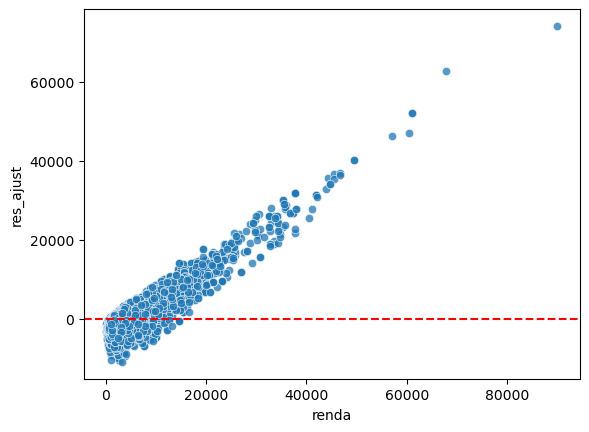

In [17]:
# Obtendo os valores dos residuos do modelo ajustado
df_renda["res_ajust"] = modelo_ajust.resid

sns.scatterplot(x = "renda", y = "res_ajust", data = df_renda, alpha = .75) # Plot dos pontos residuais
plt.axhline(y = 0, color = "r", linestyle = "--") # Plot da linha que não contem residuos

Nota-se que os resíduos apenas estão inclinados, mas muito bem alinhados com a reta oblíqua 45°, exibindo uma relação linear entre o crescimento das variáveis, o que infelizmente mostra que ainda não é o ajuste ideal para a renda. A qualidade pode ser indicada por modelo parcialmente bom. O que afirma a necessidade de refinamento.